# construct better data set

In [61]:
#using random forest to access importance of features
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#read data set
df = pd.read_csv('train.csv')

In [62]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
#remove PassengerId, Cabin, Name
new_df = df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1)

In [64]:
#insert missing Age values into median, using imputer
from sklearn.preprocessing import Imputer
#create Imputer object and set params
imr = Imputer(missing_values='NaN',strategy='median',axis=0)
#execute preprocessing
new_df['Age'] = imr.fit_transform(new_df[['Age']].values)

In [65]:
#Next parameter is Embarked.strategy is frequent so recreate Imputer object
imr = Imputer(missing_values='NaN',strategy='most_frequent')
#Imputer only can numeric values ,so convert str into numeric using map function
#create dictionary
embarked_mapping = {'C':1,'Q':2,'S':3}
#convert usinig map function
embarked_int = new_df['Embarked'].map(embarked_mapping)
#Imputing
new_df['Embarked'] = imr.fit_transform(embarked_int[:,np.newaxis])

In [66]:
#Next parametar is Sex.convert int type data
sex_mapping = {'female':0,'male':1}
new_df['Sex'] = new_df['Sex'].map(sex_mapping)

In [68]:
y = new_df.iloc[:,0]
X = new_df.iloc[:,1:]

In [69]:
#analysis importance of features using random forest
from sklearn.ensemble import RandomForestClassifier
#name of features
feat_labels = new_df.columns[1:]
# craete random forest object
forest = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
#fitting the model
forest.fit(X,y)
#extract importance of features
importances = forest.feature_importances_
#extract index of features importance with decend
indices = np.argsort(importances)[::-1]
#print importances
for i in range(X.shape[1]):
    print('%2d) %-*s %f') %(i+1,30,feat_labels[indices[i]],importances[indices[i]])

 1) Fare                           0.271870
 2) Sex                            0.262786
 3) Age                            0.258407
 4) Pclass                         0.086389
 5) SibSp                          0.049572
 6) Parch                          0.037655
 7) Embarked                       0.033322


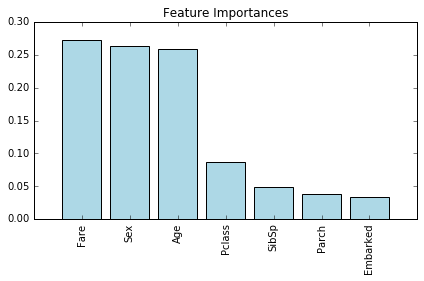

In [70]:
#plot features importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X.shape[1]])
plt.tight_layout()
plt.show()

In [81]:
#create new features
#gerating a family size column
new_df['FamilySize'] = new_df['SibSp'] + new_df['Parch']
#generate Nmaelength using .aplly method
new_df['NameLength'] = df['Name'].apply(lambda x:len(x))
#generate child(Age<18) and adult(Age>=18) 
new_df['Adult'] = (df['Age']>=18).astype(int)

In [82]:
y = new_df.iloc[:,0]
X = new_df.iloc[:,1:]

In [85]:
#analysis importance of features using random forest
from sklearn.ensemble import RandomForestClassifier
#name of features
feat_labels = new_df.columns[1:]
# craete random forest object
forest = RandomForestClassifier(criterion='entropy',n_estimators=1000,random_state=0,n_jobs=-1)
#fitting the model
forest.fit(X,y)
#extract importance of features
importances = forest.feature_importances_
#extract index of features importance with decend
indices = np.argsort(importances)[::-1]
#print importances
for i in range(X.shape[1]):
    print('%2d) %-*s %f') %(i+1,30,feat_labels[indices[i]],importances[indices[i]])

 1) Fare                           0.206401
 2) Sex                            0.193545
 3) NameLength                     0.188979
 4) Age                            0.183035
 5) Pclass                         0.074231
 6) FamilySize                     0.046414
 7) Embarked                       0.032378
 8) SibSp                          0.028378
 9) Adult                          0.024138
10) Parch                          0.022499


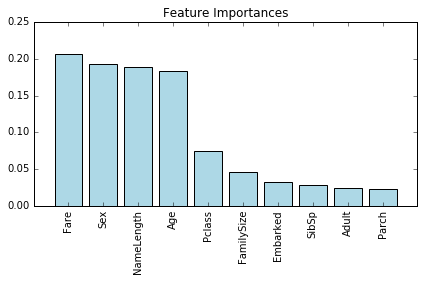

In [86]:
#plot features importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X.shape[1]])
plt.tight_layout()
plt.show()